In [1]:
import praw

In [2]:
reddit = praw.Reddit(client_id='Redacted',
                    client_secret= 'Redacted',
                    user_agent='Redacted',
                    username='Redacted',
                    password='Redacted',)

In [50]:
#Poll Reddit by sub
sub='LiverpoolFC'
subReddit = reddit.subreddit(sub)


In [4]:
total_limit = 100
Player_Ratings = []
cycle= True
count = 0
beginning_of_season = 1659744000


In [51]:

hot_liv = subReddit.search('Player Ratings')

submission_list = [
    x for x in hot_liv
    if (x.created_utc >= beginning_of_season and x.link_flair_text == 'Player Ratings')
]



In [53]:
import pandas as pd
data = pd.DataFrame()

for i in submission_list:
    submission = reddit.submission(i)
    finaltitle = ''
    title = i.title.split()
    for i in range(len(title)):
        if ']' in title[i]:
            newtitle = title[i+1::]
            finaltitle = ' '.join(newtitle)
    print(finaltitle)
    data[finaltitle] = 0
    
    comment_data = []
    
    submission.comments.replace_more(limit=None)
    
    for comment in submission.comments.list():
        comment_data.append(str(comment.body))
        
    print(len(comment_data))
    
    ser = pd.Series(comment_data)
    data[finaltitle] = ser


LIVERPOOL FC 2 - 5 REAL MADRID
138
CRYSTAL PALACE 0 - 0 LIVERPOOL FC
89
LIVERPOOL FC 2 - 0 WOLVES
41
WOLVES 3 - 0 LIVERPOOL FC
67
NEWCASTLE 0 - 2 LIVERPOOL FC
14
LIVERPOOL FC 2 - 0 EVERTON
26
BRIGHTON 2 - 1 LIVERPOOL FC
91

84
BRIGHTON 3 - 0 LIVERPOOL FC
26
WOLVES 0 - 1 LIVERPOOL FC & LIVERPOOL FC 0 - 0 CHELSEA
11
Mid-Season Review & Southampton
15
Liverpool 1 - 0 Man City
34
Liverpool 3 - 1 Southampton
10
Liverpool 1 - 0 West Ham
23
Liverpool 1 - 2 Leeds
15
EVERTON 0 - 0 LIVERPOOL FC & NAPOLI 4 - 1 LIVERPOOL FC
72
Spurs 1 - 2 Liverpool
9
Nottingham Forest 1 - 0 Liverpool
15
Liverpool 1 - 0 Man City
22
Fulham 2 - 2 Liverpool
126
Rangers 1 - 7 Liverpool
13
Arsenal 3 - 2 Liverpool
21
Everton 0 - 0 Liverpool
51
Nottingham Forest 1 - 0 Liverpool
8
Liverpool 3 - 3 Brighton
15
Liverpool 2 - 1 Ajax
23
Spurs
5
LIVERPOOL FC 1 - 1 CRYSTAL PALACE
49
Leeds
4
Liverpool 0 (3) - (2) 0 Derby County
3
Arsenal
7
Liverpool 1 - 0 West Ham
6
Liverpool 9 - 0 Bournemouth
24
Manchester United 2 - 1 Liverpool


C:\Users\mjjyo\AppData\Local\Temp\ipykernel_28620\2909672879.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pd.Series(comment_data)


In [54]:
data

,LIVERPOOL FC 2 - 5 REAL MADRID,CRYSTAL PALACE 0 - 0 LIVERPOOL FC,LIVERPOOL FC 2 - 0 WOLVES,WOLVES 3 - 0 LIVERPOOL FC,NEWCASTLE 0 - 2 LIVERPOOL FC,LIVERPOOL FC 2 - 0 EVERTON,BRIGHTON 2 - 1 LIVERPOOL FC,,BRIGHTON 3 - 0 LIVERPOOL FC,WOLVES 0 - 1 LIVERPOOL FC & LIVERPOOL FC 0 - 0 CHELSEA,...,Arsenal,Liverpool 9 - 0 Bournemouth,Manchester United 2 - 1 Liverpool,Liverpool 2 - 0 Rangers,Man United 2 - 1 Liverpool,Liverpool 2 - 0 Napoli,Napoli 4 - 1 Liverpool,Liverpool 2-0 Rangers,Liverpool 1 - 1 Crystal Palace,Ajax 0 - 3 Liverpool
0,Oh god this is gonna be the most satisfying 1 ...,"The boys got some minutes in their legs, no in...",Is it possible to give a referee a negative ra...,"Don’t filter out the mass 1/10s, they aren’t s...",Alisson 10/10 would recommend.,That was so nice to give good ratings,Fabinho: How far into the negatives can we go?,Some 6s are not like the other 6s,The word cloud tells everything you need to know.,Thanks as always for doing these. \n\nPersonal...,...,I think Salah might get one of our highest sco...,Firmino from 3.52 in the United game to 9.88 i...,> Kloppout \n\nI do hope this was said in jest...,I found it hard to rate our forwards in the co...,This might be an all time low grades since thi...,"Even though I disagree Jones was that bad, I c...","Overall 3, is being kind","Trent dead last on the season averages, hopefu...",Honestly given how poor the first two results ...,That team performances page ... 🤦
1,Never got going in the 2nd half after Gomez ne...,Naby saw Gomez from the last game and said bet,Seems like we bought Fab some new legs.,Lowest ratings I've ever given in years. Don't...,"Not gonna lie, i'm drunk as fuck right now. Th...",Been waiting for this for a good while…\n\nAls...,I feel bad for Gakpo I don't think he's done a...,Ratings by who? These are like the safest rati...,How did Konate come away so lightly? He made W...,Think Thiago has been slightly underrated rece...,...,The rangers game really needs to take the oppo...,Salah with the lowest rating is honestly fair ...,"The word cloud’s like a round of Pointless, co...",Wrong link mate,I gave the midfield performance a 1 only becau...,Jones should deffo be rested higher,How is it that all the players on the ride sid...,"I get that ""it's just Rangers"" but a win is a ...",How did Henderson only receive a 5.92? He came...,NaN
2,Teams finished. Major investment needed in mid...,Can Fabinho get a negative as a substitute? Co...,Trent going under the radar. Imo he had his be...,Gomez and Matip will be the standout lows. \n\...,"Other than that skill Bobby was absolute wank,...",Bajcetic led the way in the midfield and shows...,18-year-old Bajcetic on a yellow card MOTM by ...,Gomez was horrendous until he moved to RB. Phi...,Do people genuinely think Doak was our best pl...,Thiago a bit low for the Wolves game. Best pla...,...,Thiago gets a higher rating than Henderson eve...,I wonder how many gave a blanket 9 to everyone.,How can you make 0 tackles and 0 interceptions...,Hendo will probably still have the lowest rati...,My one word is simply midfield. Would need a p...,NaN,Every player except for Elliot played for Live...,"Milner still isn't on it for some reason, so I...",Elliott should’ve been MOTM. He did far more t...,NaN
3,"Sad to say, but I truly think Joe Gomez career...",I think doing these would be better a day late...,"Atmosphere seemed very poor on TV, not sure if...",Bajcetic has been excellent. Imagine turning u...,"Ali 10, Darwin 10, Gakpo 10.\n\nSee you Tuesda...","Can't give enough praise to Bajectic, Robbo an...",One of the stat was “most accurate passes in t...,"Kelleher deserves more than a 6, made some foo...",I don't understand how Henderson and Fab have ...,Please do them after a match like before if yo...,...,how on earth did the ref in that a'nal game ge...,how many votes do these tend to get?,Could someone please explain the Hot or Not me...,"Thanks, happy to do them!\n\nSomething I've be...",One word: shite.

In [143]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = (stopwords.words('english'))
new_stop = ['I', 'game','like', 'think', 'get', 'one', 'The', 'much', 'We', 'going', 'still', 'would', 'He', 'good', "he's", 'also', 'could']
stop.extend(new_stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjjyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
corpus = []

for col in data.columns:
    for comment in data[col].dropna():
        new = comment.split()
        corpus = corpus + [word for word in new]


In [106]:
from collections import Counter
import seaborn as sns

In [107]:
counter = Counter(corpus)
most = counter.most_common()

<AxesSubplot:>

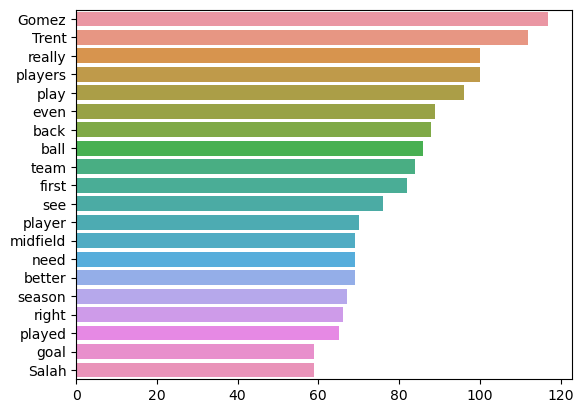

In [108]:
x, y = [], []

for word, count in most[:100]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x)

In [109]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

<AxesSubplot:>

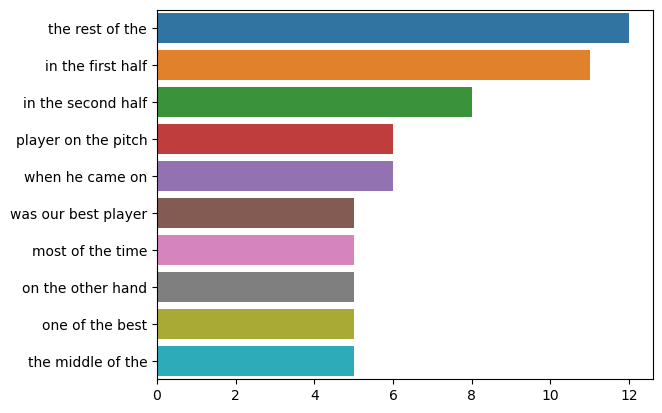

In [131]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                 for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    
    return words_freq[:10]

comment_list_data = []

for col in data.columns:
    for comment in data[col].dropna():
        comment_list_data.append(comment)
        
# Create bigrams
top_n_bigrams = get_top_ngram(comment_list_data, 4)[:10]
x, y = map(list, zip(*top_n_bigrams))
sns.barplot(x=y, y=x)

In [144]:
# import tensorflow as tf 
# import torch
# from transformers import pipeline
# setntiment_pipeline = pipeline('sentiment-analysis')
# sentiment_pipeline(comment_list_data)

ModuleNotFoundError: No module named 'torch'